## Name: Tushar Gavkhare
## Colab link:
https://colab.research.google.com/drive/1uZOAxD2osNlOkWQPnVCz4-16Nr2eZ8yX?usp=sharing

The raw images are first cropped then added manually to checked or unchecked and then used Logistic Regression to create model for prediction.


In [1]:
import zipfile
 
#Open the zip file in read mode
my_zipfile = zipfile.ZipFile("/content/Files.zip", mode='r')
 
print('Extracting all file...')
 
my_zipfile.extractall()
 
print('Extracting Done!')
my_zipfile.close()

Extracting all file...
Extracting Done!


In [35]:
import PIL
from PIL import Image
for i in range(1,7):
  path = '/content/Files/Raw_Dataset/img-'+str(i)+'.jpg'
  img = PIL.Image.open(path)
  print(img.size)

(129, 121)
(51, 48)
(54, 45)
(54, 45)
(54, 45)
(130, 120)


In [17]:
import shutil
path = '/content/cropped'
shutil.rmtree(path, ignore_errors=True)

In [18]:
#adding scanned quetion papers in croppped_que folder
import cv2
import os
import numpy as np
import PIL
from PIL import Image
os.mkdir('/content/cropped')
def box_extraction(img_for_box_extraction_path, cropped_dir_path , id):
  img = cv2.imread(img_for_box_extraction_path, 0)  # Read the image
  (thresh, img_bin) = cv2.threshold(img, 128, 255,cv2.THRESH_BINARY | cv2.THRESH_OTSU)  # Thresholding the image
  img_bin = 255-img_bin  # Invert the image
  cv2.imwrite("Image_bin.jpg",img_bin)
   
  # Defining a kernel length
  kernel_length = np.array(img).shape[1]//30
     
  # A verticle kernel of (1 X kernel_length), which will detect all the verticle lines from the image.
  verticle_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, kernel_length))
  # A horizontal kernel of (kernel_length X 1), which will help to detect all the horizontal line from the image.
  hori_kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (kernel_length, 1))
  # A kernel of (3 X 3) ones.
  kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 1))
# Morphological operation to detect verticle lines from an image
  img_temp1 = cv2.erode(img_bin, verticle_kernel, iterations=3)
  verticle_lines_img = cv2.dilate(img_temp1, verticle_kernel, iterations=3)
  cv2.imwrite("verticle_lines.jpg",verticle_lines_img)
# Morphological operation to detect horizontal lines from an image
  img_temp2 = cv2.erode(img_bin, hori_kernel, iterations=3)
  horizontal_lines_img = cv2.dilate(img_temp2, hori_kernel, iterations=3)
  cv2.imwrite("horizontal_lines.jpg",horizontal_lines_img)
# Weighting parameters, this will decide the quantity of an image to be added to make a new image.
  alpha = 0.5
  beta = 1.0 - alpha
# This function helps to add two image with specific weight parameter to get a third image as summation of two image.
  img_final_bin = cv2.addWeighted(verticle_lines_img, alpha, horizontal_lines_img, beta, 0.0)
  img_final_bin = cv2.erode(~img_final_bin, kernel, iterations=2)
  (thresh, img_final_bin) = cv2.threshold(img_final_bin, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
# For Debugging
    # Enable this line to see verticle and horizontal lines in the image which is used to find boxes
  cv2.imwrite("img_final_bin.jpg",img_final_bin)
    # Find contours for image, which will detect all the boxes
  contours, _ = cv2.findContours(img_final_bin, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    # Sort all the contours by top to bottom.
  #(contours, boundingBoxes) = sort_contours(contours, method="top-to-bottom")
  idx = 0
  Bigimg = PIL.Image.open(img_for_box_extraction_path)
  W,H = Bigimg.size
  for c in contours:
    # Returns the location and width,height for every contour
    x, y, w, h = cv2.boundingRect(c)
    if(idx==0): 
      xprev=x
    # print("rectangle " + str(x) +" " + str(y) +" " + str(w) + " " + str(h) +" " + str(idx) + "c" + str(c))
    # If the box height is greater then 20, widht is >80, then only save it as a box in "cropped/" folder.if (w > 65 and h > 50) and (w < 85 and h < 80): if ((w > 55 and h > 45) and (w < 85 and h < 80))
    # if ((w > 200 and h > 250) and (w < 400 and h < 400)):
      #print("rectangle " + str(w) + " " + str(h) +" " + str(idx) + "c" + str(c))
    if((w > W/2-10 and h > H/2-12) and (w < W/2 + 10 and h < H/2+10)):
      idx += 1
      new_img = img[y:y+h, x:x+w]
      xprev = x
      cv2.imwrite(cropped_dir_path + str(id) + str(idx) + '.jpg', new_img)
      #encodeImage(cropped_dir_path + str(idx) + '.jpg',idx)

In [19]:
for t in range(1,10):
  box_extraction("/content/Files/Raw_Dataset/img-"+str(1)+".jpg", '/content/cropped/',1)
  box_extraction("/content/Files/Raw_Dataset/img-"+str(t)+".jpg", '/content/cropped/',t)

In [30]:
import shutil
path = '/content/data'
shutil.rmtree(path, ignore_errors=True)

In [31]:
os.mkdir('data')
os.mkdir('/content/data/checked')
os.mkdir('/content/data/unchecked')
checked = ['/content/cropped/11.jpg','/content/cropped/21.jpg', '/content/cropped/61.jpg']
unchecked = ['/content/cropped/31.jpg', '/content/cropped/41.jpg' , '/content/cropped/51.jpg' , '/content/cropped/71.jpg' , '/content/cropped/81.jpg' , '/content/cropped/91.jpg']
for i in checked:
  img = cv2.imread(i, 0)
  cv2.imwrite('/content/data/checked/' + i[17:],img)
for i in unchecked:
  img = cv2.imread(i, 0)
  cv2.imwrite('/content/data/unchecked/' + i[17:],img)

In [32]:
import pandas as pd
import os
from skimage.transform import resize
from skimage.io import imread
import numpy as np
import matplotlib.pyplot as plt
Categories=['checked','unchecked']
flat_data_arr=[] #input array
target_arr=[] #output array
datadir='data' 
#path which contains all the categories of images
for i in Categories:
    print(f'loading... category : {i}')
    path=os.path.join(datadir,i)
    for img in os.listdir(path):
        print(img)
        img_array=imread(os.path.join(path,img))
        img_resized=resize(img_array,(150,150,3))
        flat_data_arr.append(img_resized.flatten())
        target_arr.append(Categories.index(i))
    print(f'loaded category:{i} successfully')
flat_data=np.array(flat_data_arr)
target=np.array(target_arr)
df=pd.DataFrame(flat_data) #dataframe
df['Target']=target
x=df.iloc[:,:-1] #input data 
y=df.iloc[:,-1] #output data

loading... category : checked
61.jpg
21.jpg
11.jpg
loaded category:checked successfully
loading... category : unchecked
71.jpg
41.jpg
81.jpg
31.jpg
91.jpg
51.jpg
loaded category:unchecked successfully


In [41]:
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
model = DecisionTreeClassifier()

In [42]:
model.fit(x,y)

DecisionTreeClassifier()

In [43]:
from sklearn.metrics import accuracy_score
y_pred=model.predict(x)
print("The predicted Data is :")
print(y_pred)
print("The actual data is:")
print(np.array(y))
print(f"The model is {accuracy_score(y_pred,y)*100}% accurate")

The predicted Data is :
[0 0 0 1 1 1 1 1 1]
The actual data is:
[0 0 0 1 1 1 1 1 1]
The model is 100.0% accurate


Enter URL of Image :21.jpg


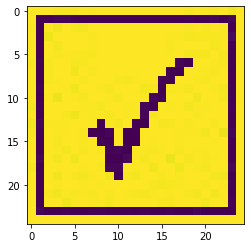

checked = 100.0%
unchecked = 0.0%
The predicted image is : checked


In [44]:
url=input('Enter URL of Image :')
img=imread('data/checked/' + url)
plt.imshow(img)
plt.show()
img_resize=resize(img,(150,150,3))
l=[img_resize.flatten()]
probability=model.predict_proba(l)
for ind,val in enumerate(Categories):
    print(f'{val} = {probability[0][ind]*100}%')
print("The predicted image is : "+Categories[model.predict(l)[0]])

In [37]:
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor,GradientBoostingClassifier
from sklearn.ensemble import AdaBoostRegressor,AdaBoostClassifier
from sklearn.ensemble import ExtraTreesRegressor,ExtraTreesClassifier
from sklearn.neighbors import KNeighborsRegressor,KNeighborsClassifier
from sklearn.svm import SVR,SVC
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score,mean_squared_error

In [39]:
classifiers=[['Logistic Regression :',LogisticRegression()],
       ['Decision Tree Classification :',DecisionTreeClassifier()],
       ['Random Forest Classification :',RandomForestClassifier()],
       ['Gradient Boosting Classification :', GradientBoostingClassifier()],
       ['Ada Boosting Classification :',AdaBoostClassifier()],
       ['Extra Tree Classification :', ExtraTreesClassifier()],
       ['K-Neighbors Classification :',KNeighborsClassifier()],
       ['Gausian Naive Bayes :',GaussianNB()]]
cla_pred=[]
for name,model in classifiers:
    model=model
    model.fit(x,y)
    predictions = model.predict(x)
    cla_pred.append(accuracy_score(y,predictions))
    print(name,accuracy_score(y,predictions))

Logistic Regression : 1.0
Decision Tree Classification : 1.0
Random Forest Classification : 1.0
Gradient Boosting Classification : 1.0
Ada Boosting Classification : 1.0
Extra Tree Classification : 1.0
K-Neighbors Classification : 0.6666666666666666
Gausian Naive Bayes : 1.0
